In [1]:
%matplotlib notebook
import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))


import torch
from torch.profiler import record_function
from torch_geometric.nn.resolver import aggregation_resolver as aggr_resolver
import numpy as np


# Timing function for performance evaluation
import time
class catchtime:    
    def __init__(self, arg = 'Unnamed Context'):
#         print('__init__ called with', arg)
        self.context = arg
        
    def __enter__(self):
        self.time = time.perf_counter()
        return self

    def __exit__(self, type, value, traceback):
        self.time = time.perf_counter() - self.time
        self.readout = f'{self.context} took: {1000 * self.time:.3f} ms'
        print(self.readout)

# Math/parallelization library includes
import numpy as np
import torch

# Imports for neighborhood searches later on
from torch_geometric.nn import radius
from torch_scatter import scatter


# Plotting includes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import matplotlib.tri as tri
import random

from datautils import *

from plotting import *
plt.style.use('dark_background')
# plt.style.use('default')
from tqdm.notebook import trange, tqdm
from tqdm.notebook import tqdm

In [2]:
basePath = '~/servus05/dev/datasets/generative2D/train'
basePath = os.path.expanduser(basePath)

simulationFiles = [basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')]
debugPrint(simulationFiles)

simulationFiles [list] = ['/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_14-43-33.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_15-27-36.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_14-41-01.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_15-39-36.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_15-10-00.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_14-28-20.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_15-15-52.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_14-51-18.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2023-03-22_15-30-36.hdf5', '/home/winchenbach/servus05/dev/datasets/generative2D/train/generative - 2

In [3]:
# trainFolder = '/mnt/c/Users/Rimuru/trainingData'
trainFolder = '~/trainingdata_2D_deltaSPH_001'
trainFolder = '~/servus05/dev/torchSPH2/Cconv/trainingData'
trainFolder = '~/servus03/torchSPH2/Cconv/trainingData'
# trainFolder = '~/servus05/dev/torchSPH2/Cconv/trainingDataSeedVariance'
# trainFolder = '~/servus05/dev/torchSPH2/Cconv/trainingDataLongEpoch'
trainFolder = os.path.expanduser(trainFolder)
subfolders = [ f.path for f in os.scandir(trainFolder) if f.is_dir() ]
# subfolders = [ f.path for f in os.scandir('./trainingDataBasisFunctions8x8') if f.is_dir() ]
print(len(subfolders))

subfolders = [s for s in subfolders if os.path.exists(s + '/results.json')]
print(len(subfolders))

dataDict = {}

# subfolders = [subfolders[0]]
for s in tqdm(subfolders):
    with open("%s/results.json" % s, "r") as read_file:
        decodedArray = json.load(read_file)
        dataDict[s] = decodedArray
#         print(decodedArray['hyperParameters'])   

74
66


  0%|          | 0/66 [00:00<?, ?it/s]

In [4]:
dataFolder = '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31'

In [5]:
dataFiles = [ f.path for f in os.scandir(dataFolder)]
print(dataFiles)

['/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/gaussian[4] x cubic_spline[4] @ cartesian - default[   4].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/cubic_spline[4] x gaussian[4] @ cartesian - input[   3].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/gaussian[4] x gaussian[4] @ cartesian - default[   3].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/cubic_spline[4] x cubic_spline[4] @ cartesian - default[   5].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/cubic_spline[4] x gaussian[4] @ cartesian - output[   3].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/cubic_spline[4] x gaussian[4] @ cartesian - input[   5].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/chebyshev[4] x chebyshev[4] @ cartesian - default[   4].hdf5', '/mnt/data/processedDataset/generative - 2023-03-13_10-03-31/linear[4] x cubic_spline[4] @ cartesian - interleaved[   5].hdf

In [59]:

# networkFile.close()

In [54]:
# gtFile.close()
gtFolder = '/mnt/data/processedDataset/generative - 2023-03-13_10-16-02'

In [55]:
# gtFile = h5py.File(dataFiles[0])
gtFile = h5py.File(gtFolder + '/gt.hdf5')

In [56]:
gtFile['   0'].keys()

<KeysViewHDF5 ['meshDensity', 'meshDivergence', 'meshVelocity', 'particleColor', 'particleColorGrad', 'particleDensity', 'particlePostions', 'particleVelocity']>

<IPython.core.display.Javascript object>


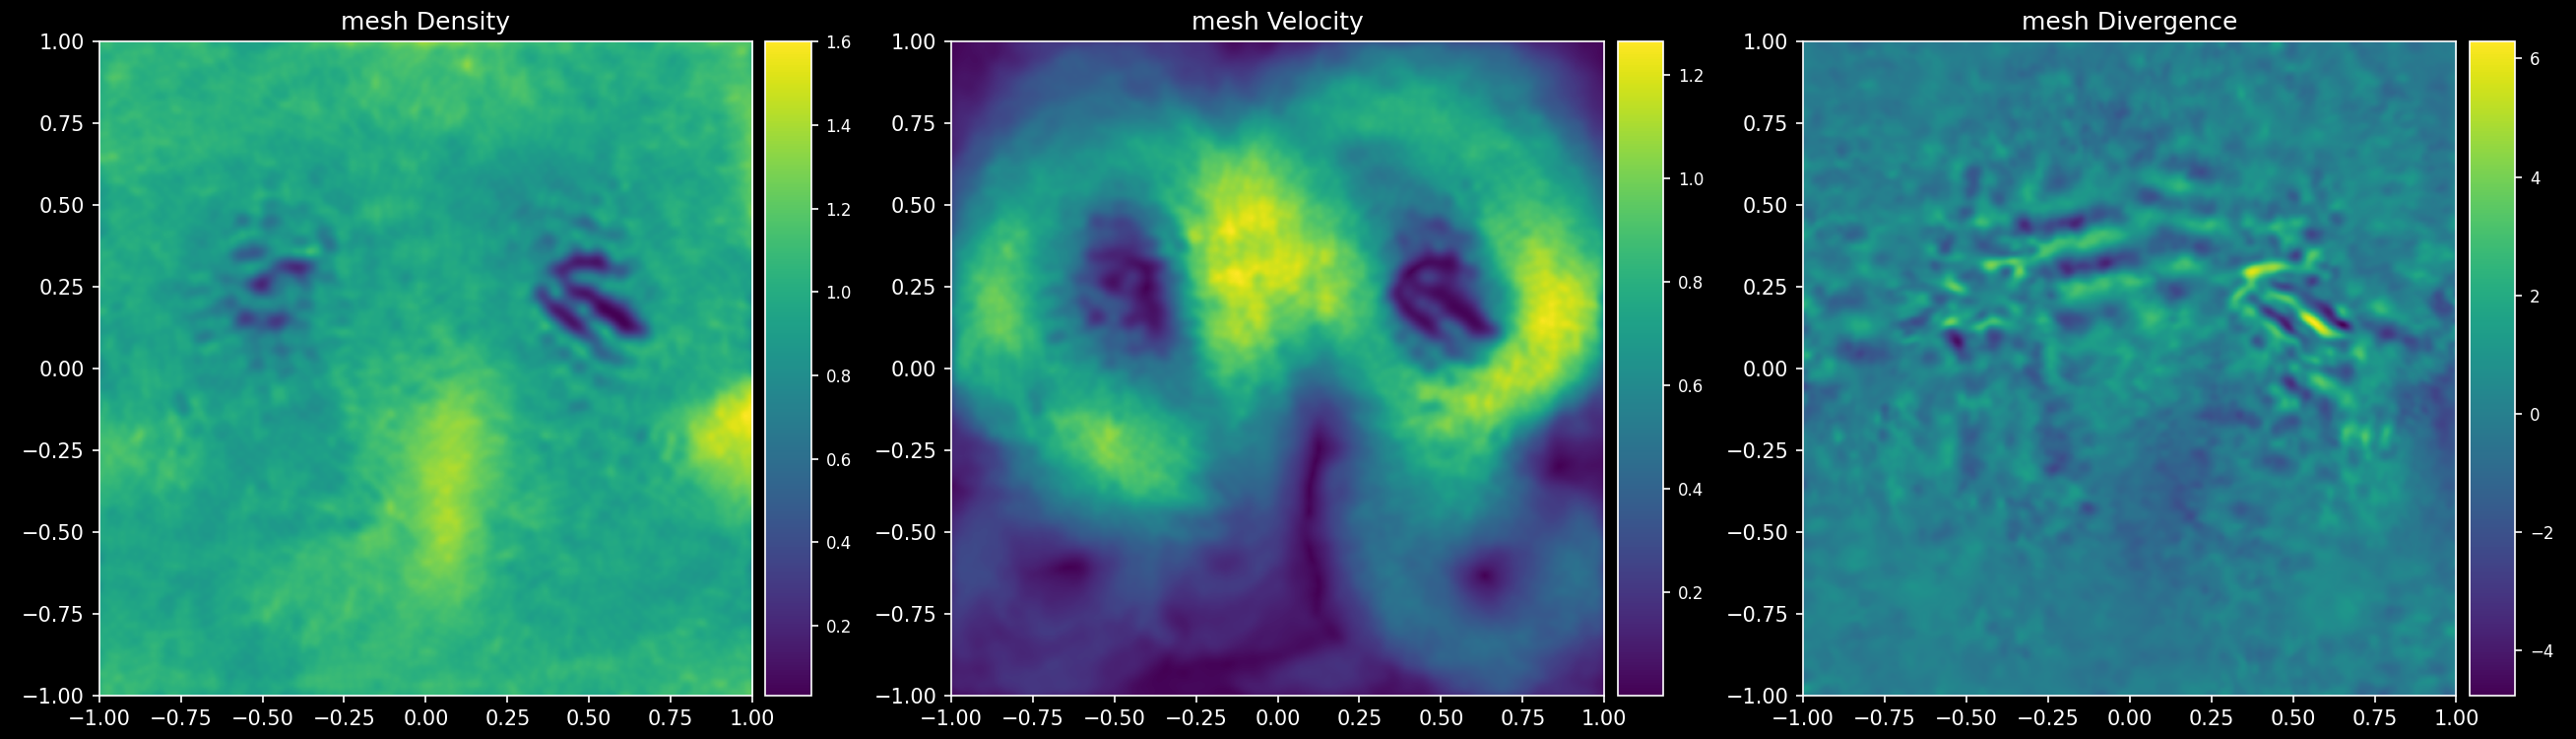

In [57]:
fig, axis = plt.subplots(1, 3, figsize=(16*1.09,5), sharex = False, sharey = False, squeeze = False)


axis[0,0].axis('equal')
imDensity = axis[0,0].imshow(gtFile['   0']['meshDensity'], extent = [-1,1,-1,1])
ax1_divider = make_axes_locatable(axis[0,0])
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
densityCbar = fig.colorbar(imDensity, cax=cax1,orientation='vertical')
densityCbar.ax.tick_params(labelsize=8) 
axis[0,0].set_title('mesh Density')

axis[0,1].axis('equal')
imVelocity = axis[0,1].imshow(np.linalg.norm(gtFile['   0']['meshVelocity'],axis=-1), extent = [-1,1,-1,1])
ax1_divider = make_axes_locatable(axis[0,1])
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
velocityCbar = fig.colorbar(imVelocity, cax=cax1,orientation='vertical')
velocityCbar.ax.tick_params(labelsize=8) 
axis[0,1].set_title('mesh Velocity')

axis[0,2].axis('equal')
imDivergence = axis[0,2].imshow(gtFile['   0']['meshDivergence'], extent = [-1,1,-1,1])
ax1_divider = make_axes_locatable(axis[0,2])
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
divergenceCbar = fig.colorbar(imDivergence, cax=cax1,orientation='vertical')
divergenceCbar.ax.tick_params(labelsize=8) 
axis[0,2].set_title('mesh Divergence')

fig.tight_layout()


In [51]:
networkFile = h5py.File(dataFiles[0])

In [11]:
startFrames = list(networkFile.keys())
print(startFrames)

['   0', ' 128', ' 256', ' 384', ' 512', ' 640', ' 768', ' 896', '1024', '1152', '1280', '1408', '1536', '1664', '1792', '1920', '2048', '2176', '2304', '2432', '2560', '2688', '2816', '2944', '3072']


In [12]:
targetFrames = list(networkFile[startFrame].keys())
print(targetFrames)

NameError: name 'startFrame' is not defined

<IPython.core.display.Javascript object>


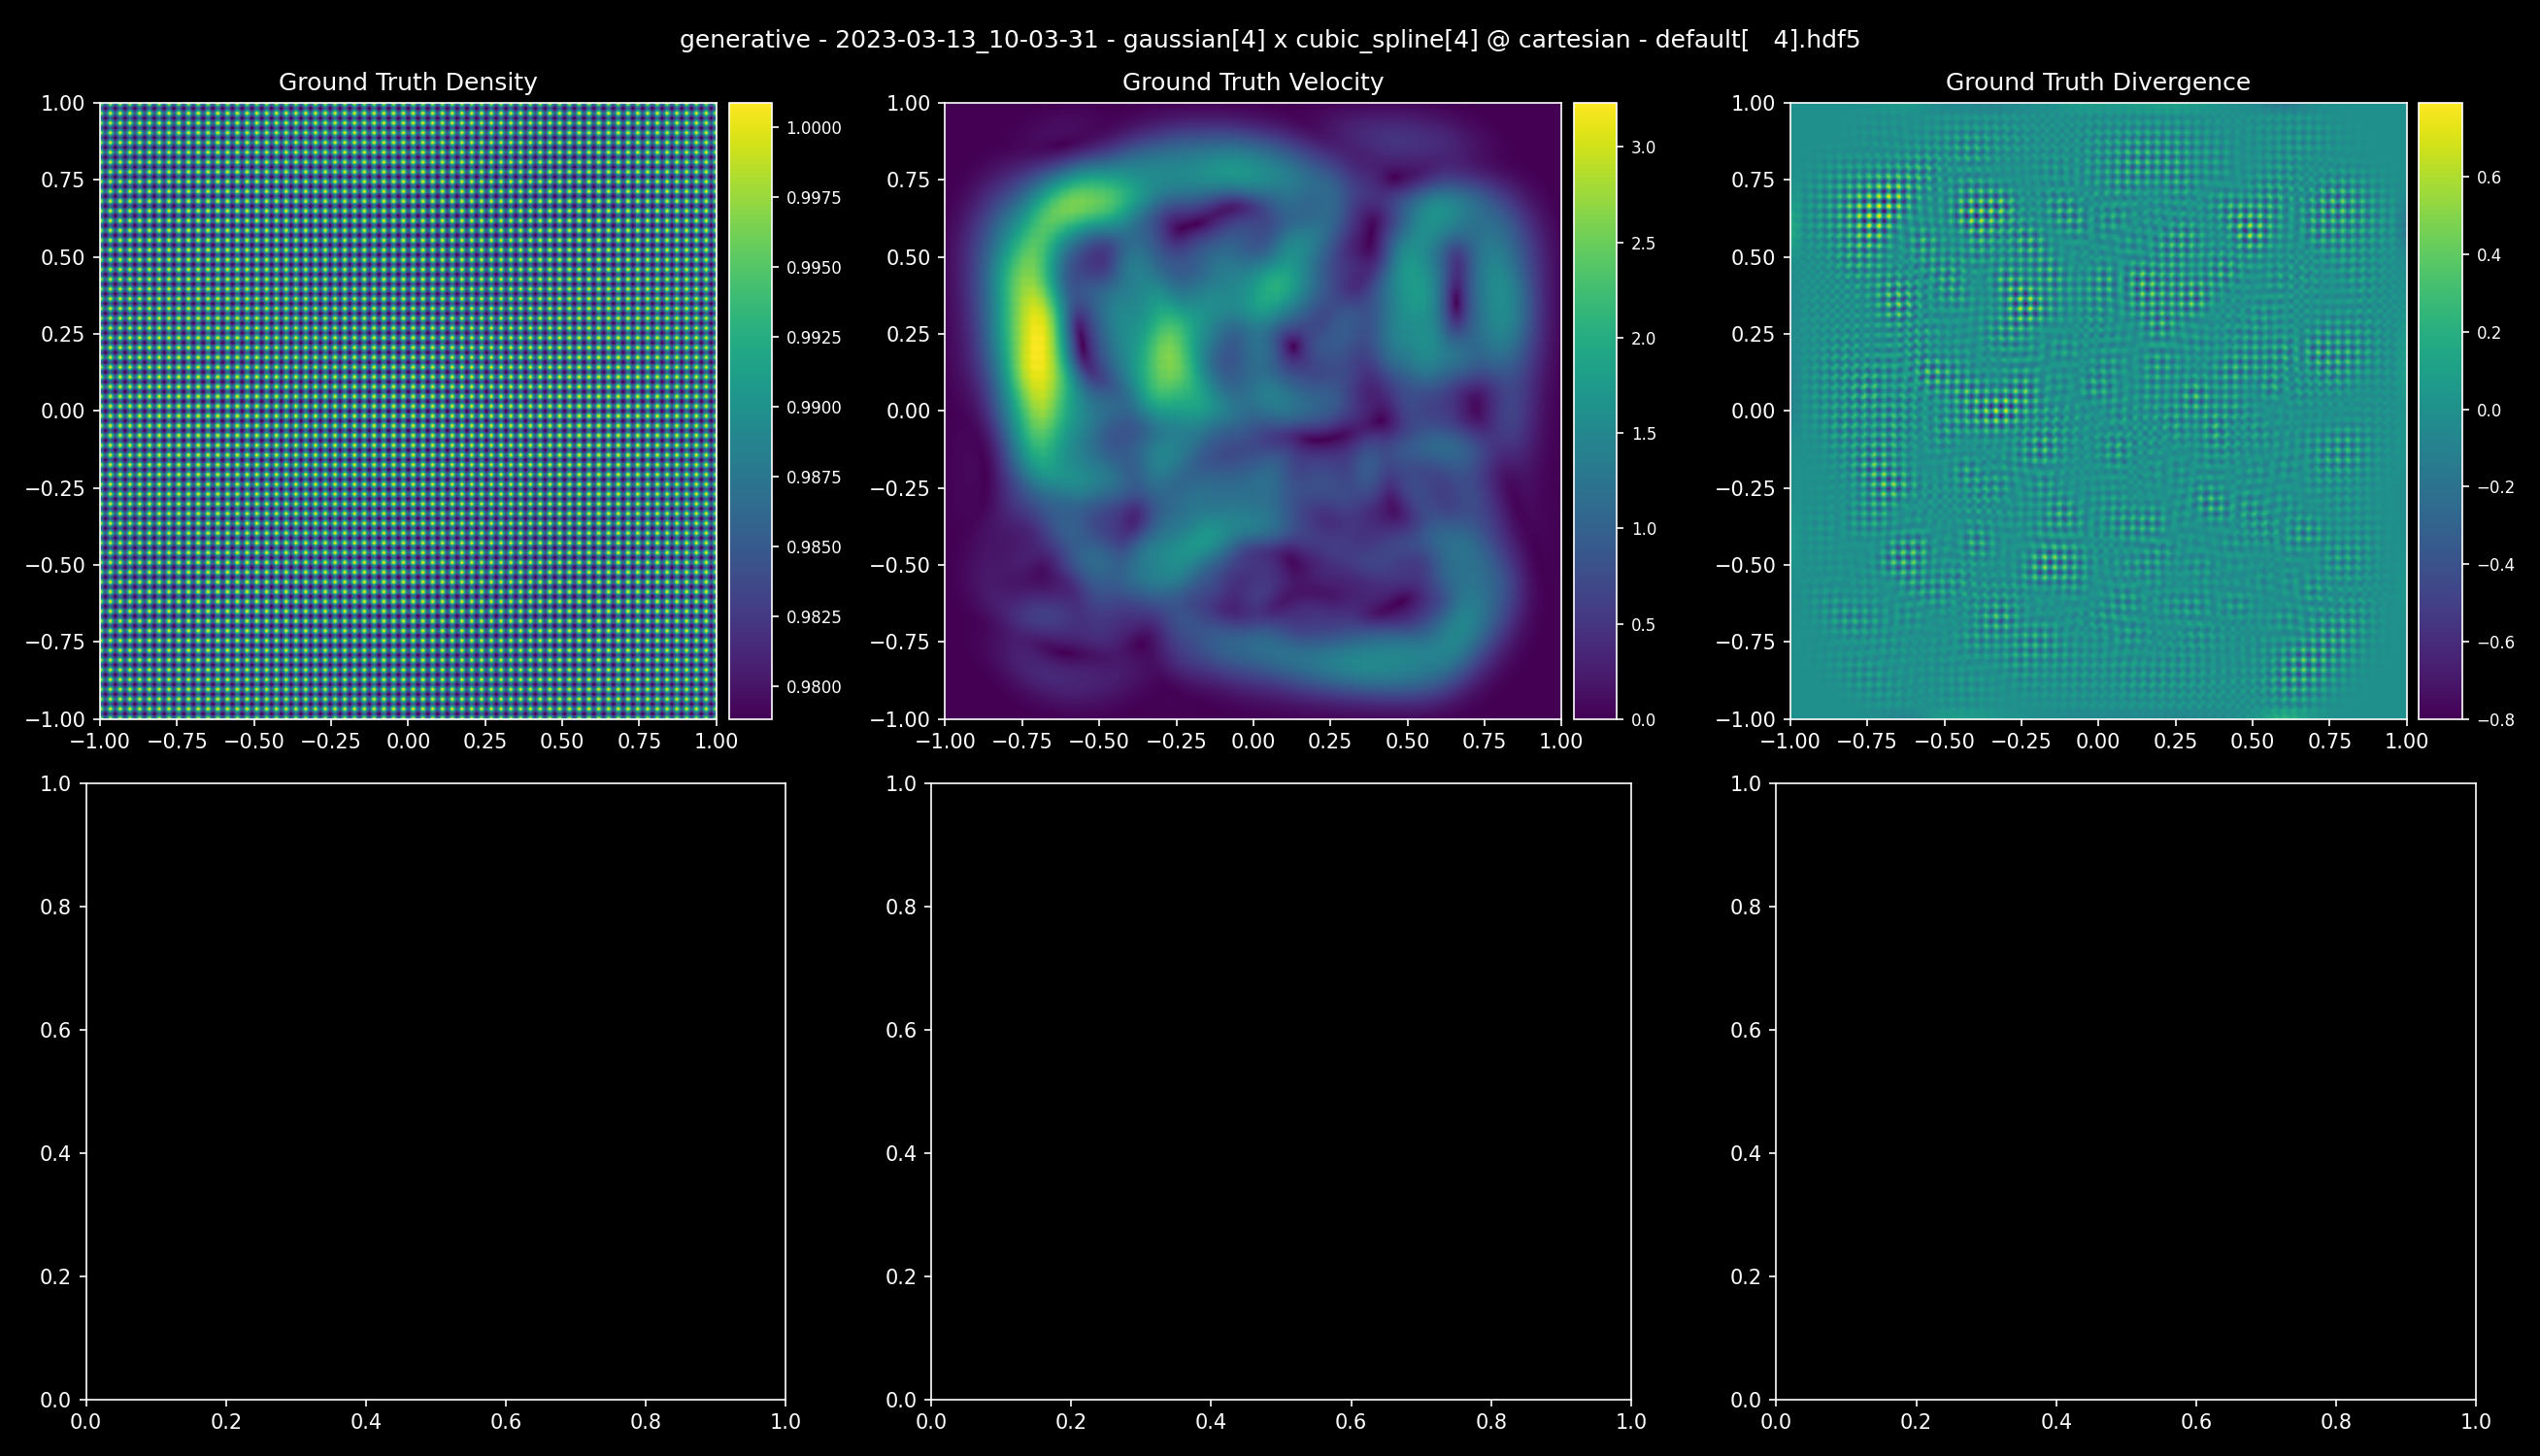

interactive(children=(Dropdown(description='startFrame', options=('   0', ' 128', ' 256', ' 384', ' 512', ' 64…

<function __main__.updatePlot(startFrame, targetFrame, gtFrame)>

In [53]:
fig, axis = plt.subplots(2, 3, figsize=(16*1.09,10), sharex = False, sharey = False, squeeze = False)
startFrames = list(networkFile.keys())
startFrame = startFrames[0]
targetFrames = list(networkFile[startFrame].keys())
targetFrame = targetFrames[0]
# startFrame  = '   0'
# targetFrame = ' 720'

predDensity = networkFile[startFrame][targetFrame]['meshDensity']
predVelocity = np.linalg.norm(networkFile[startFrame][targetFrame]['meshVelocity'],axis=-1)
predDivergence = networkFile[startFrame][targetFrame]['meshDivergence']

gtDensity = gtFile[targetFrame]['meshDensity']
gtVelocity = np.linalg.norm(gtFile[targetFrame]['meshVelocity'],axis=-1)
gtDivergence = gtFile[targetFrame]['meshDivergence']

fig.suptitle('%s - %s' % (dataFiles[0].split('/')[-2], dataFiles[0].split('/')[-1]))

def imPlot(axis, data, title):
    axis.axis('equal')
    imPredDensity = axis.imshow(data, extent = [-1,1,-1,1])
    ax1_divider = make_axes_locatable(axis)
    cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
    predDensityCbar = fig.colorbar(imPredDensity, cax=cax1,orientation='vertical')
    predDensityCbar.ax.tick_params(labelsize=8) 
    axis.set_title(title)
    
    return imPredDensity, predDensityCbar
imGtDensity,    gtDensityCbar    = imPlot(axis[0,0], gtDensity,    'Ground Truth Density')
imGtVelocity,   gtVelocityCbar   = imPlot(axis[0,1], gtVelocity,   'Ground Truth Velocity')
imGtDivergence, gtDivergenceCbar = imPlot(axis[0,2], gtDivergence, 'Ground Truth Divergence')

# imPredDensity,    predDensityCbar    = imPlot(axis[1,0], predDensity,    'predicted Density')
# imPredVelocity,   predVelocityCbar   = imPlot(axis[1,1], predVelocity,   'predicted Velocity')
# imPredDivergence, predDivergenceCbar = imPlot(axis[1,2], predDivergence, 'predicted Divergence')

fig.tight_layout()

def updatePlot(startFrame, targetFrame, gtFrame):
    predDensity = np.array(networkFile[startFrame][targetFrame]['meshDensity'])
    predVelocity = np.linalg.norm(networkFile[startFrame][targetFrame]['meshVelocity'],axis=-1)
    predDivergence = np.array(networkFile[startFrame][targetFrame]['meshDivergence'])

    gtDensity = np.array(gtFile[gtFrame]['meshDensity'])
    gtVelocity = np.linalg.norm(gtFile[gtFrame]['meshVelocity'],axis=-1)
    gtDivergence = np.array(gtFile[gtFrame]['meshDivergence'])
    
    def updateIm(im, cbar, data):
        im.set_data(data)
        im.set_clim(vmin = np.min(data), vmax = np.max(data))
        
#     updateIm(imPredDensity, predDensityCbar, np.flip(predDensity, axis = 0))
#     updateIm(imPredVelocity, predVelocityCbar, np.flip(predVelocity, axis = 0))
#     updateIm(imPredDivergence, predDivergenceCbar, np.flip(predDivergence, axis = 0))
    
    updateIm(imGtDensity, gtDensityCbar, np.flip(gtDensity, axis = 0))
    updateIm(imGtVelocity, gtVelocityCbar, np.flip(gtVelocity, axis = 0))
    updateIm(imGtDivergence, gtDivergenceCbar, np.flip(gtDivergence, axis = 0))
    fig.canvas.draw_idle()
    
updatePlot(startFrame, targetFrames[32], targetFrames[33])

interact(updatePlot, startFrame = startFrames, targetFrame = targetFrames, gtFrame = targetFrames)